## Heart Attack Risk Prediction Model 
This is the 




## Import Libraries
We start this project by importing all the libraries required to complete this project 

In [12]:
#import libraries

# 1. to handle the data
import numpy as np
import pandas as pd

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# 4. To train the machine 
from sklearn.model_selection import train_test_split

# 5. For classification task
from sklearn.linear_model import LogisticRegression

# 6. For metrics
from sklearn.metrics import accuracy_score, confusion_matrix



## Load the dataset

In [13]:
df = pd.read_csv("./heart_attack_prediction_dataset.csv")
#df.head()

## Exploratory Data Analysis (EDA)

Exploring each column

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [15]:
df.shape

(8763, 26)

In [16]:
df['Age'].min(), df['Age'].max()

(18, 90)

In [17]:
df['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

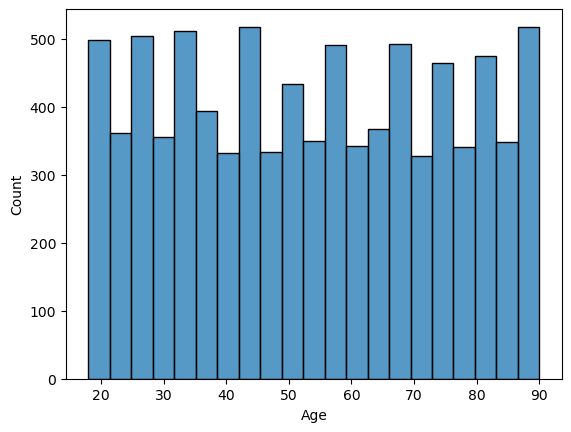

In [18]:
sns.histplot(df['Age'])

<AxesSubplot: xlabel='Age', ylabel='Count'>

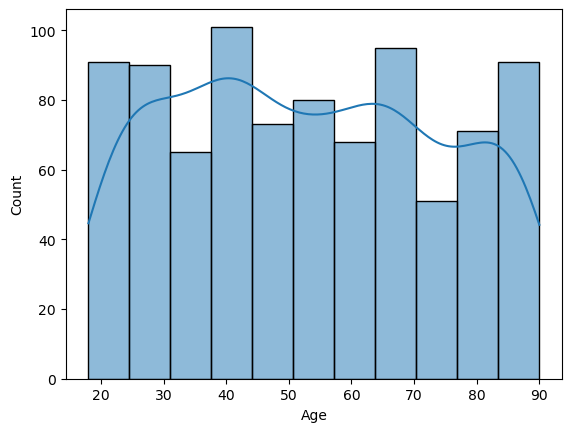

In [19]:
sample_df = df.sample(frac = 0.1, random_state=42)
sns.histplot(sample_df['Age'], kde=True)


In [20]:

df1 = df['Blood Pressure']
type(df1)
arr = df1.to_numpy()
print(df)
arr

     Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1       

array(['158/88', '165/93', '174/99', ..., '161/75', '119/67', '138/67'],
      dtype=object)

These first few sections of code intend to convert the broadly categorical feature of Blood pressure to a numerical feature of Systolic and Diastolic Blood pressure.

In [21]:
i = 0
a =[]
b=[]
for i in range(len(arr)):
    x, y= arr[i].split('/')
    a.append(x)
    b.append(y)
    

In [22]:
df = df.drop(columns= ['Blood Pressure'])
df['Systolic BP'] = a
df['Diastolic BP'] = b



In [23]:
df.insert(4, 'Systolic BP', df.pop('Systolic BP'))
df.insert(5, 'Diastolic BP', df.pop('Diastolic BP'))
df

,Patient ID,Age,Sex,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158,88,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165,93,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174,99,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163,100,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91,88,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94,76,61,1,1,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157,102,73,1,0,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161,75,105,0,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119,67,60,1,0,1,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [24]:
df.columns


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Systolic BP',
       'Diastolic BP', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [25]:
print(df.shape)
n = 1
#checking for not null values
for i in df.columns:
    if(df[i].count() == df.shape[0]):
        print(n , " " , i)
        n = n + 1

(8763, 27)
1   Patient ID
2   Age
3   Sex
4   Cholesterol
5   Systolic BP
6   Diastolic BP
7   Heart Rate
8   Diabetes
9   Family History
10   Smoking
11   Obesity
12   Alcohol Consumption
13   Exercise Hours Per Week
14   Diet
15   Previous Heart Problems
16   Medication Use
17   Stress Level
18   Sedentary Hours Per Day
19   Income
20   BMI
21   Triglycerides
22   Physical Activity Days Per Week
23   Sleep Hours Per Day
24   Country
25   Continent
26   Hemisphere
27   Heart Attack Risk


No null valued feature was encountered with the help of the above code, so no imputation was necessary.

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x = l.fit_transform(df['Hemisphere'])
df = df.drop(columns=['Hemisphere'])
df.insert(25, 'Hemisphere', x)
x = l.fit_transform(df['Continent'])
df = df.drop(columns=['Continent'])
df.insert(24, 'Continent', x)
x = l.fit_transform(df['Patient ID'])
df = df.drop(columns = ['Patient ID'])
df.insert(0, 'Patient ID', x)
# label encoding for sex(female = 0, male = 1)
x = l.fit_transform(df['Sex'])
df = df.drop(columns = ['Sex'])
df.insert(2, 'Sex', x)
df_sorted = df.sort_values(by = 'Patient ID', ascending = True)
x = l.fit_transform(df_sorted['Diet'])
df_sorted = df_sorted.drop(columns = ['Diet'])
df_sorted.insert(13, 'Diet', x)
x = l.fit_transform(df_sorted['Country'])
df_sorted = df_sorted.drop(columns = ['Country'])
df_sorted.insert(23, 'Country', x)

Till this step, all we have been doing is converting all the categorical features to numerical ones for model training.


0            Argentina
1               Canada
2               France
3               Canada
4             Thailand
             ...      
8758          Thailand
8759            Canada
8760            Brazil
8761            Brazil
8762    United Kingdom
Name: Country, Length: 8763, dtype: object

In [28]:
import pycountry as pc
import pandas as pd
countries = list(pc.countries)
country_names = [country.name for country in countries]
country = pd.DataFrame(country_names, columns=['Country'])
print(country)
x = l.fit_transform(country)
x

           Country
0            Aruba
1      Afghanistan
2           Angola
3         Anguilla
4    Åland Islands
..             ...
244          Samoa
245          Yemen
246   South Africa
247         Zambia
248       Zimbabwe

[249 rows x 1 columns]


/usr/lib/python3/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 11,   0,   5,   6, 248,   1,   4, 232,   9,  10,   3,   7,  78,
         8,  12,  13,  14,  35,  20,  22,  26,  34,  17,  33,  16,  15,
        27, 184,  19,  21,  23,  25,  30,  18,  32,  24,  29,  28,  41,
        39,  46, 214,  43,  44,  58,  38,  50,  49,  51,  47,  48,  36,
        52,  54,  55,  45,  40,  56,  57,  82,  60,  61,  59,  62,   2,
        63,  64,  67, 244, 208,  68,  70,  74,  73,  71,  75,  72, 143,
        79, 233,  81,  91,  83,  84,  92,  88,  80,  93,  66,  85,  87,
        86,  90,  76,  89,  94,  99,  96,  98,  53,  95, 100, 103, 107,
       102,  31, 106, 104, 105, 101, 108, 109, 110, 112, 113, 111, 114,
       115, 120,  37, 116, 186, 118, 119, 121, 123, 125, 126, 187, 127,
       209, 124, 128, 129, 122, 130, 188, 149, 145, 144, 131, 134, 142,
       137, 163, 135, 136, 151, 147, 146, 164, 150, 139, 148, 138, 140,
       132, 133, 141, 152, 156, 159, 162, 160, 158, 161, 155, 165, 154,
       153, 157, 166, 167, 170, 175, 173, 174, 168, 171, 176, 17